
¡Hola, Abraham!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>



# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [213]:
# Cargar todas las librerías
from scipy import stats as st
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con la carga de math para hacer el redondeo con otros métodos

## Cargar datos

In [214]:
# Carga los archivos de datos en diferentes DataFrames
megaline_calls = pd.read_csv('megaline_calls.csv')
megaline_internet = pd.read_csv('megaline_internet.csv')
megaline_messages = pd.read_csv('megaline_messages.csv')
megaline_plans = pd.read_csv('megaline_plans.csv')
megaline_users = pd.read_csv('megaline_users.csv')


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [215]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
megaline_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [216]:
# Imprime una muestra de los datos para las tarifas
print(megaline_plans.head(5))


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Surf:
	•	Más barato mensualmente.
	•	Incluye mucho menos en minutos, mensajes y datos.
	•	Más caro por uso adicional.

Ultimate:
	•	Costo mensual más alto.
	•	Tarifas adicionales más baratas.

¿Qué plan conviene?
	•	Surf es ideal para usuarios con bajo consumo.
	•	Ultimate conviene para usuarios intensivos que hablan, navegan y envían muchos mensajes.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [217]:
# Checamos si hay valores nulos en el DataFrame de las tarifas
print(megaline_plans.isna().sum())
# Checamos si hay espacios en blanco en los nombres de las columnas
megaline_plans['plan_name'] = megaline_plans['plan_name'].str.strip()
print(megaline_plans.columns)
#Verificamos si hay duplicados en el DataFrame de las tarifas
print(megaline_plans.duplicated().sum())


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')
0


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [218]:
#Convertimos de megabytes a gigabytes
megaline_plans['gb_per_month'] = megaline_plans['mb_per_month_included'] / 1024


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Usuarios/as

In [219]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
megaline_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [220]:
# Imprime una muestra de datos para usuarios
megaline_users.head(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En la columna churn_date tiene solo 34 de 500 usuarios han cancelado su servicio, tenemos 466 nulos y aparte la columna reg_date y churn_date está como objeto no como date

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [221]:
#Primero convertimos las columnas de fecha a tipo datetime
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'],errors='coerce')
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'],errors='coerce')


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [222]:
#Verificamos si hay duplicados en el DataFrame de usuarios
print(megaline_users.duplicated().sum())    
# Checamos si hay valores nulos en el DataFrame de usuarios
print(megaline_users.isna().sum())


0
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


## Llamadas

In [223]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(megaline_calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [224]:
# Imprime una muestra de datos para las llamadas
megaline_calls.head(5)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

De igual forma la coumna call_date es de tipo objeto, tenemos que cambiarlo a tipo fecha

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [225]:
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], errors='coerce')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [226]:
#Verificamos si hay duplicados en el DataFrame de usuarios
print(megaline_calls.duplicated().sum())    
# Checamos si hay valores nulos en el DataFrame de usuarios
print(megaline_calls.isna().sum())
# Elimina llamadas con duración 0 antes de redondear
megaline_calls = megaline_calls[megaline_calls['duration'] > 0]

0
id           0
user_id      0
call_date    0
duration     0
dtype: int64


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

## Mensajes

In [227]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
megaline_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [228]:
# Imprime una muestra de datos para los mensajes
megaline_messages.head(5)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

La columna message_date está como tipo object, lo tenemos que pasar a tipo fecha datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [229]:
#Convertimos la columna message_date a tipo datetime
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], errors='coerce')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [230]:
#Verificamos si hay duplicados en el DataFrame de usuarios
print(megaline_calls.duplicated().sum())    
# Checamos si hay valores nulos en el DataFrame de usuarios
print(megaline_calls.isna().sum())

0
id           0
user_id      0
call_date    0
duration     0
dtype: int64


## Internet

In [231]:
# Imprime la información general/resumida sobre el DataFrame de internet
megaline_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [232]:
# Imprime una muestra de datos para el tráfico de internet
megaline_internet.head(5)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

De igual manera la columna session_date es de tipo object, lo tenemos que pasar a tipo datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [233]:
#Convertimos la columna session_date a tipo datetime
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], errors='coerce')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [234]:
# Calcular el uso en gigabytes (GB)
megaline_internet['gb_used_total'] = megaline_internet['mb_used'] / 1024
megaline_internet['gb_used_rounded'] = np.ceil(megaline_internet['gb_used_total']).astype(int)
# Verificamos si hay duplicados en el DataFrame de usuarios
print(megaline_internet.duplicated().sum())    
# Checamos si hay valores nulos en el DataFrame de usuarios
print(megaline_internet.isna().sum())

0
id                 0
user_id            0
session_date       0
mb_used            0
gb_used_total      0
gb_used_rounded    0
dtype: int64


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [235]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(megaline_plans['plan_name'].unique())
megaline_plans.head(5)



['surf' 'ultimate']


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [236]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
megaline_calls['month'] = megaline_calls['call_date'].dt.to_period('M')
print(megaline_calls['month'].head(5))
pivot_calls = megaline_calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()


0    2018-12
1    2018-12
2    2018-12
3    2018-12
4    2018-12
Name: month, dtype: period[M]



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [237]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
megaline_calls['duration_rounded'] = np.ceil(megaline_calls['duration']).astype(int)
print(megaline_calls['duration_rounded'].head(5))
minutes_per_user_month = (megaline_calls.groupby(['user_id', 'month'])['duration_rounded'].sum().reset_index(name='minutes_used'))

0     9
1    14
2    15
3     6
4     5
Name: duration_rounded, dtype: int64


In [238]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
megaline_messages['month'] = megaline_messages['message_date'].dt.to_period('M')
messages_per_user_month = (megaline_messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count'))


In [239]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
megaline_internet['month'] = megaline_internet['session_date'].dt.to_period('M')
internet_per_user_month = (megaline_internet.groupby(['user_id', 'month'])['gb_used_rounded'].sum().reset_index(name='gb_used_total'))


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [240]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_monthly_data = (calls_per_user_month
                    .merge(minutes_per_user_month, on=['user_id', 'month'], how='outer')
                    .merge(messages_per_user_month, on=['user_id', 'month'], how='outer')
                    .merge(internet_per_user_month, on=['user_id', 'month'], how='left'))

In [241]:
# Añade la información de la tarifa
user_monthly_data = user_monthly_data.merge(
    megaline_users[['user_id', 'plan']],
    on='user_id',
    how='left'
)
user_monthly_data = user_monthly_data.merge(
    megaline_plans,
    left_on='plan',
    right_on='plan_name',
    how='left'
)
print(user_monthly_data.columns)


Index(['user_id', 'month', 'calls_count', 'minutes_used', 'messages_count',
       'gb_used_total', 'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'gb_per_month'],
      dtype='object')


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [242]:
# Calcula el ingreso mensual para cada usuario
# 1. Vamos a verificar si no hay valores ausentes y los reemplazamos por 0
user_monthly_data = user_monthly_data.fillna(0)

# 2. Calculamos los minutos, mensajes y GB extra
user_monthly_data['extra_minutes'] = (user_monthly_data['minutes_used'] - user_monthly_data['minutes_included']).clip(lower=0)
user_monthly_data['extra_messages'] = (user_monthly_data['messages_count'] - user_monthly_data['messages_included']).clip(lower=0)

# Convertir MB incluidos a GB
user_monthly_data['gb_used_total'] = user_monthly_data['gb_used_total'].fillna(0)
user_monthly_data['gb_included'] = user_monthly_data['mb_per_month_included'] / 1024
user_monthly_data['extra_gb'] = (user_monthly_data['gb_used_total'] - user_monthly_data['gb_included']).clip(lower=0)

# 3. Calcular el costo de los excedentes
user_monthly_data['minutes_cost'] = user_monthly_data['extra_minutes'] * user_monthly_data['usd_per_minute']
user_monthly_data['messages_cost'] = user_monthly_data['extra_messages'] * user_monthly_data['usd_per_message']
user_monthly_data['gb_cost'] = user_monthly_data['extra_gb'] * user_monthly_data['usd_per_gb']

# 4. Calcular el ingreso total
user_monthly_data['total_monthly_revenue'] = (
    user_monthly_data['usd_monthly_pay'] +
    user_monthly_data['minutes_cost'] +
    user_monthly_data['messages_cost'] +
    user_monthly_data['gb_cost']
)

# Imprimir las primeras filas del DataFrame con los ingresos mensuales
print(user_monthly_data[['user_id', 'month', 'plan', 'total_monthly_revenue']].head())
user_monthly_data.head(5)

   user_id    month      plan  total_monthly_revenue
0     1000  2018-12  ultimate                  70.00
1     1001  2018-08      surf                  80.00
2     1001  2018-09      surf                 280.00
3     1001  2018-10      surf                 370.09
4     1001  2018-11      surf                 360.00


,user_id,month,calls_count,minutes_used,messages_count,gb_used_total,plan,messages_included,mb_per_month_included,minutes_included,...,plan_name,gb_per_month,extra_minutes,extra_messages,gb_included,extra_gb,minutes_cost,messages_cost,gb_cost,total_monthly_revenue
0,1000,2018-12,16.0,124.0,11.0,4.0,ultimate,1000,30720,3000,...,ultimate,30.0,0.0,0.0,30.0,0.0,0.0,0.00,0.0,70.00
1,1001,2018-08,22.0,182.0,30.0,21.0,surf,50,15360,500,...,surf,15.0,0.0,0.0,15.0,6.0,0.0,0.00,60.0,80.00
2,1001,2018-09,38.0,315.0,44.0,41.0,surf,50,15360,500,...,surf,15.0,0.0,0.0,15.0,26.0,0.0,0.00,260.0,280.00
3,1001,2018-10,47.0,393.0,53.0,50.0,surf,50,15360,500,...,surf,15.0,0.0,3.0,15.0,35.0,0.0,0.09,350.0,370.09
4,1001,2018-11,49.0,426.0,36.0,49.0,surf,50,15360,500,...,surf,15.0,0.0,0.0,15.0,34.0,0.0,0.00,340.0,360.00


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Hice algunos cambios con respecto a llenar las llamadas en 0 y redondearlos hacia arriba, asi como los minutos usados en GB, espero su pronta respuesta

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

   plan    month  avg_duration
0  surf  2018-01      8.035000
1  surf  2018-02      8.482081
2  surf  2018-03      8.211607
3  surf  2018-04      8.372292
4  surf  2018-05      8.430052


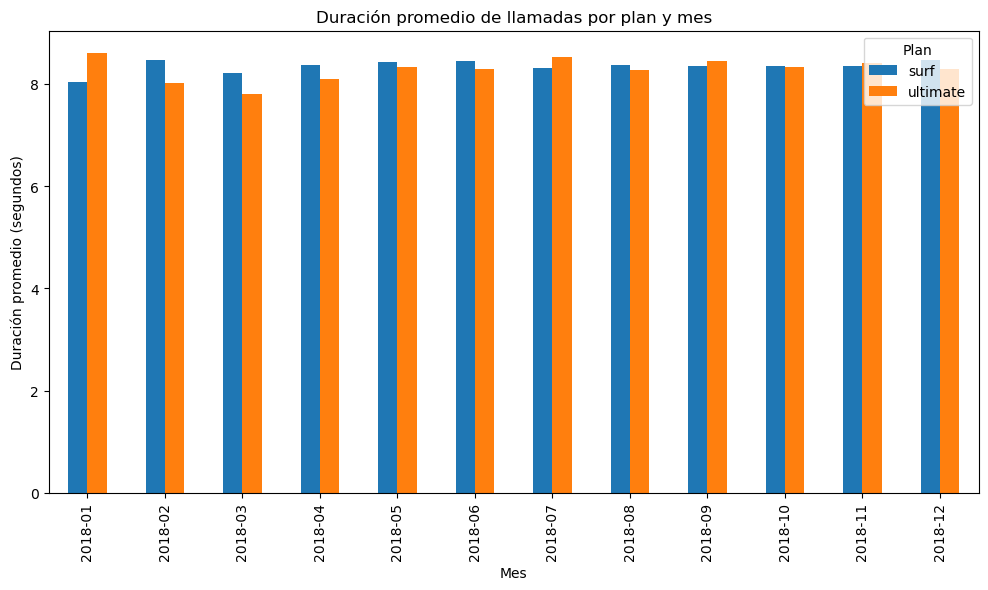

In [243]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Hacemos un merge para fusionar los datos de llamadas con los planes
calls_with_plan = megaline_calls.merge(
    megaline_users[['user_id', 'plan']],
    on='user_id',
    how='left'
)
avg_call_duration = (
    calls_with_plan
    .groupby(['plan', 'month'])['duration']
    .mean()
    .reset_index(name='avg_duration')
)
print(avg_call_duration.head(5))
df = avg_call_duration.pivot(index='month', columns='plan', values='avg_duration').reset_index()
df.plot(x='month', kind='bar', figsize=(12, 6), title='Duración promedio de llamadas por plan y mes', xlabel='Mes', ylabel='Duración promedio (segundos)')
plt.legend(title='Plan')
plt.show()


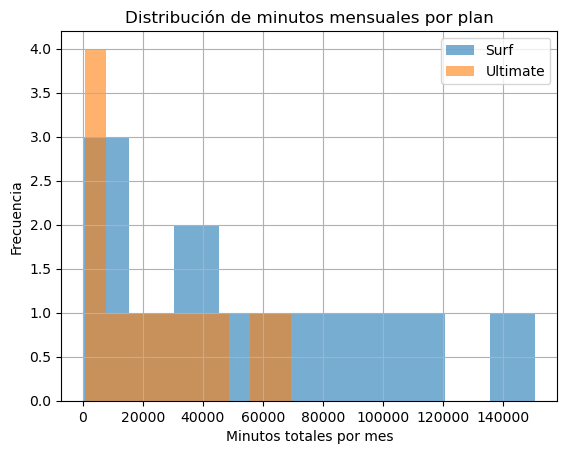

In [244]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutes_by_plan_month = (
    user_monthly_data
    .groupby(['plan', 'month'])['minutes_used']
    .sum()
    .reset_index(name='total_minutes')
)
df = minutes_by_plan_month.pivot(index='month', columns='plan', values='total_minutes').reset_index()
df['surf'].hist(bins=10, alpha=0.6, label='Surf')
df['ultimate'].hist(bins=10, alpha=0.6, label='Ultimate')
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos totales por mes')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()




[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [245]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Media
mean_minutes = user_monthly_data['minutes_used'].mean()

# Varianza
var_minutes = user_monthly_data['minutes_used'].var()

# Mostrar resultados
print(f"Media de minutos mensuales usados: {mean_minutes:.2f}")
print(f"Varianza de minutos mensuales usados: {var_minutes:.2f}")


Media de minutos mensuales usados: 429.85
Varianza de minutos mensuales usados: 55678.53


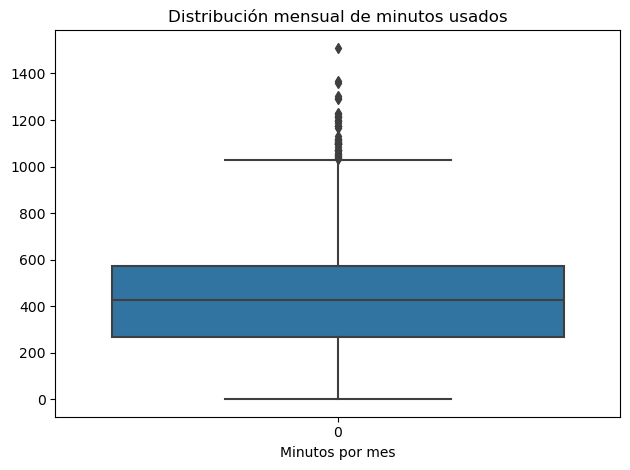

In [246]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(user_monthly_data['minutes_used'])
plt.title('Distribución mensual de minutos usados')
plt.xlabel('Minutos por mes')
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

La mediana representa el valor central que está en 400 minutos.

El valor de la caja está entre los 250 a los 600 minutos.

Los bigotes nos dicen que hay usuarios que usan más de 1000 minutos en las llamadas.

Hay mucha variación en el uso de las llamadas.

Algunos usuarios podrían beneficiarse de planes más grandes, como ultimate, mientras que otros están bien con lo mínimo.



### Mensajes

In [247]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_by_plan_month = (
    user_monthly_data
    .groupby(['plan', 'month'])['messages_count']
    .sum()
    .reset_index(name='total_messages')
)

messages_by_plan_month.head(11)


,plan,month,total_messages
0,surf,2018-01,21.0
1,surf,2018-02,108.0
2,surf,2018-03,351.0
3,surf,2018-04,870.0
4,surf,2018-05,1849.0
5,surf,2018-06,2454.0
6,surf,2018-07,3271.0
7,surf,2018-08,4662.0
8,surf,2018-09,5968.0
9,surf,2018-10,8020.0


In [248]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
trafic_by_plan_month = (
    user_monthly_data
    .groupby(['plan', 'month'])['gb_used_total']
    .sum()
    .reset_index(name='total_gb')
)
trafic_by_plan_month.head(11)


,plan,month,total_gb
0,surf,2018-01,28.0
1,surf,2018-02,270.0
2,surf,2018-03,719.0
3,surf,2018-04,1444.0
4,surf,2018-05,2606.0
5,surf,2018-06,3639.0
6,surf,2018-07,4872.0
7,surf,2018-08,6525.0
8,surf,2018-09,7803.0
9,surf,2018-10,9948.0


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Se observa un incremento progresivo y constante mes a mes.

Desde 21 mensajes en enero hasta más de 9,000 en noviembre.

Hay un aumento del número de usuarios activos en surf.

### Internet

El consumo sube mes a mes de forma acelerada.

De apenas 28 GB en enero a más de 11,000 GB en noviembre.


El crecimiento es exponencial. De enero a febrero el tráfico se multiplicó por 10.

De junio a julio subió de 3,639 a 4,872 GB

De octubre a noviembre, pasó de 9,951 a 11,308 GB

Al parecer los usuarios están pagando más por los excedentes del consumo de GB.

Podrián hacer campañas o promociones para los usuarios de plan Surf se cambien a Ultimate y reciban mas beneficios.

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [249]:
# Vamos a comparar el ingreso mensual de los usuarios por plan
revenue_stats = (
    user_monthly_data
    .groupby('plan')['total_monthly_revenue']
    .agg(['count', 'mean', 'median', 'var', 'std', 'min', 'max'])
    .round(2)
    .reset_index()
)

print(revenue_stats)

       plan  count    mean  median       var     std   min      max
0      surf   1572  282.28   290.0  26620.27  163.16  20.0  1210.37
1  ultimate    718  166.90   154.0   7619.75   87.29  70.0   532.00


Como podemos ver el plan surf genera más ingresos que el plan Ultimate.

Esto sugiere que los usuarios de surf frecuentemente exceden sus límites (minutos, mensajes, GB) y pagan más en cargos extra.

Varianza: 26647 vs 7624 en ultimate

Desviación estándar: 163.24 vs 87.32

Esto indica que los ingresos de surf son muy variables: hay usuarios que pagan poco ($20) y otros muchísimo $1200.

Ultimate, en cambio, es más estable: todos pagan más o menos lo mismo.

Esto puede representar una gran fuente de ingresos para la empresa, pero también un indicio de que estos usuarios podrían beneficiarse de un plan más generoso.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [250]:
# Prueba las hipótesis
# Filtrar ingresos por plan
surf_revenue = user_monthly_data[user_monthly_data['plan'] == 'surf']['total_monthly_revenue']
ultimate_revenue = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['total_monthly_revenue']
alpha = 0.05
results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)
print('valor p:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos mensuales entre los planes Surf y Ultimate.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en los ingresos mensuales entre los planes Surf y Ultimate.")


valor p: 3.8855312841896505e-97
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos mensuales entre los planes Surf y Ultimate.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [251]:
# Prueba las hipótesis
ny_nj_cities = ['New York-Newark-Jersey City, NY-NJ-PA MSA'] 
# Agregar ciudad al DataFrame de ingresos
user_monthly_data = user_monthly_data.merge(
    megaline_users[['user_id', 'city']],
    on='user_id',
    how='left'
)
# Vamos a comparar los ingresos mensuales de los usuarios de NY-NJ con el resto de los usuarios
# Grupo 1: Usuarios de NY-NJ
ny_nj_income = user_monthly_data[user_monthly_data['city'].isin(ny_nj_cities)]['total_monthly_revenue']

# Grupo 2: Usuarios del resto
rest_income = user_monthly_data[~user_monthly_data['city'].isin(ny_nj_cities)]['total_monthly_revenue']

# Aplicamos la prueba t de Student
alpha = 0.05
results = st.ttest_ind(ny_nj_income, rest_income, equal_var=False)
print('valor p:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos mensuales entre los usuarios de NY-NJ y el resto.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en los ingresos mensuales entre los usuarios de NY-NJ y el resto.")


valor p: 0.00517227024209027
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos mensuales entre los usuarios de NY-NJ y el resto.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis. Solamente en futuras ocasiones te recomiendo considerar realizar la prueba de levene para mostrar el supuesto de varianzas iguales. 

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Se da una estructura y limpieza en los datos.

Se cargaron y fusionaron correctamente los datos de usuarios, planes, llamadas, mensajes e Internet.

Tipos de datos incorrectos (call_date, message_date, etc.)

Se eliminaron valores nulos o se reemplazaron por 0 para evitar errores en los cálculos.

Se calcularon variables por usuario y por mes como el número de llamadas, minutos, mensajes y GB por mes, también los cargos por excedentes en llamadas, mensajes y datos y por último los ingresos totales mensuales.

El comportamiento del usuario como el uso mensual en minutos, datos y mensajes muestran un crecimiento exponencial.

En el analisis de los ingresos el plan surf generó más ingresos promedios que el plan ultimate, el plan surf es más rentable pero más inpredecible.

Se aplicaron las pruebas de las hipótesis y se rechazó la hipotesis de igualdad de ingresos entre surf y ultimate.

